[model-segmentation-with-cubist](https://www.r-bloggers.com/model-segmentation-with-cubist/)

In [1]:
library(tidyverse)
library(Matrix)
library(data.table)
setwd("D:/Projects/BrutalAge/data/")
train <- read_csv("tap_fun_train.csv")
#train$cls <- as.factor(ifelse(train$pay_price==train$prediction_pay_price,'same','diff'))
#train$cls <- as.factor(ifelse(train$pay_price==0,'free','paid'))

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.0.0     √ purrr   0.2.5
√ tibble  1.4.2     √ dplyr   0.7.6
√ tidyr   0.8.1     √ stringr 1.3.1
√ readr   1.1.1     √ forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose

Parsed with column specification:
cols(
  .default = col_integer(),
  register_time = col_datetime(format = ""),
  wood_add_value = col_double(),
  wood_reduce_value = col_double(),
  stone_add_value = col_double(),
  stone_reduce_value = col_double(),
  ivory_add_value = col_double(),
  ivory_reduce_value = col_double(),
  meat_add_v

In [2]:
#featuring combination
df<- train[,c(109,106:108)]
df$wood <- train$wood_add_value + train$wood_reduce_value
df$stone <- train$stone_add_value + train$stone_reduce_value
df$ivory <- train$ivory_add_value + train$ivory_reduce_value
df$meat <- train$meat_add_value + train$meat_reduce_value
df$magic <- train$magic_add_value + train$magic_reduce_value
df$infantry <- train$infantry_add_value + train$infantry_reduce_value + train$wound_infantry_add_value + train$wound_infantry_reduce_value
df$cavalry <- train$cavalry_add_value + train$cavalry_reduce_value + train$wound_cavalry_add_value + train$wound_cavalry_reduce_value
df$shaman <- train$shaman_add_value + train$shaman_reduce_value + train$wound_shaman_add_value + train$wound_shaman_reduce_value
#acc
df$gen_acc <- train$general_acceleration_add_value + train$general_acceleration_reduce_value
df$bld_acc <- train$building_acceleration_add_value + train$building_acceleration_reduce_value
df$rsh_acc <- train$reaserch_acceleration_add_value + train$reaserch_acceleration_reduce_value
df$train_acc <- train$training_acceleration_add_value + train$training_acceleration_reduce_value
df$treat_acc <- train$treatment_acceleraion_add_value + train$treatment_acceleration_reduce_value
#level
# df$bdlevel <- apply(train[,35:50],1,sum)
# df$sclevel <- apply(train[,51:99],1,sum)
#atk
df$pvp <- train$pvp_battle_count
df$pve <- train$pve_battle_count

In [3]:
#removing high-correlation predictors
library(caret)
cor_id <- findCorrelation(cor(subset(df,select=-prediction_pay_price)),cutoff = 0.7)
cor_cols <- colnames(subset(df,select=-prediction_pay_price))[cor_id]

flt_cols <- setdiff(names(df), cor_cols)

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



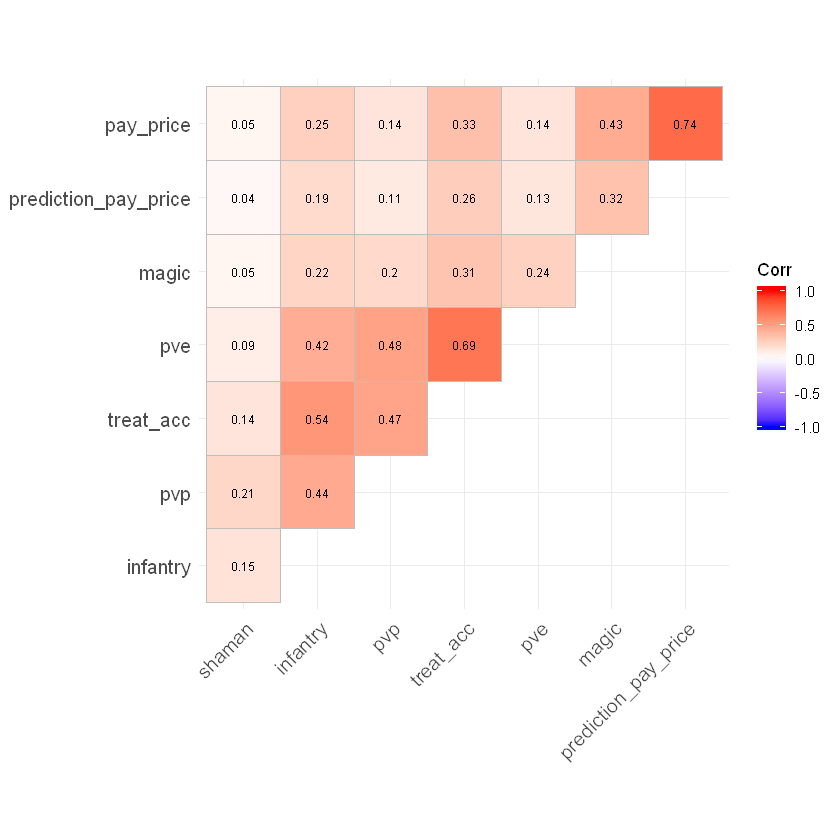

In [4]:
library(ggcorrplot)
df_flt <- data.frame(subset(df,select=flt_cols))
ggcorrplot(round(cor(df_flt),2), hc.order = TRUE, type = "upper", lab = TRUE,lab_size = 2.5)

In [5]:
df_flt <- as.data.frame(df_flt)
trn_id <- createDataPartition(df_flt$prediction_pay_price,p=0.8,list=F)
trn <- df_flt[trn_id,]
vld <- df_flt[-trn_id,]

In [6]:
trnX <- trn[,2:8]
trnY <- trn$prediction_pay_price

vldX <- vld[,2:8]
vldY <- vld$prediction_pay_price

- Linear Regression
    - LR
    - PLS
    - Ridge/Lasso
    
- Nonlinear Regression
    - Neural Networks
    - MARS
    - SVM
    - KNN

- Regression Trees
    - CART
    - RF
    - GBM
    - Cubist
    - Ensemble

In [13]:
set.seed(823)
ctrl <- trainControl(method = "cv",number=3)

In [ ]:
#Linear Regression
set.seed(823)
fit_lm <- train(trnX,trnY,method = "lm")
result_lm <- fit_lm$results
pred_lm <- predict(fit_lm,newdata = vldX)
result_lm$RMSE
RMSE(pred = pred_lm,obs = vldY)

- trn 63.61917
- vld 53.2526

In [ ]:
#PLS
set.seed(823)
fit_pls <- train(trnX,trnY,method="pls",tuneLength=10)
result_pls <- fit_pls$results
pred_pls <- predict(fit_pls,newdata = vldX)
result_pls
RMSE(pred = pred_pls,obs = vldY)

- vld 53.6510105518261

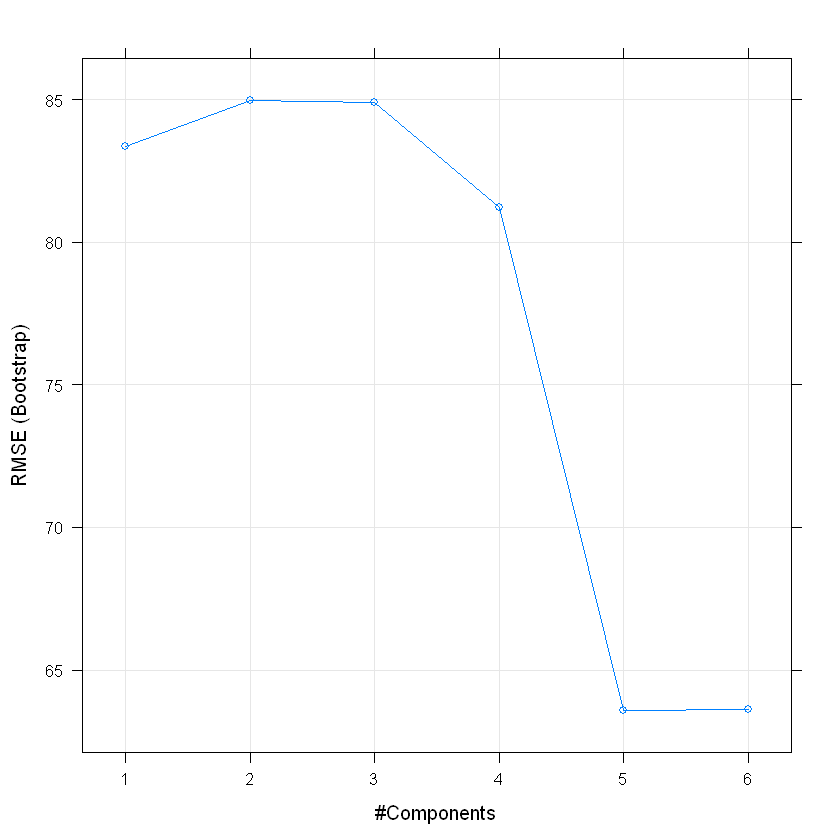

In [20]:
plot(fit_pls)

In [ ]:
#Lasso
set.seed(823)
fit_lasso <- train(trnX,trnY,methon="lasso",tuneLength=10)
result_lasso <- fit_lasso$results
pred_lasso <- predict(fit_lasso,newdata = vldX)
result_lasso
RMSE(pred = pred_lasso,obs = vldY)

In [ ]:
#mars
grid_mars <- expand.grid(.degree=1:2,.nprune=2:38)
set.seed(100)
fit_mars <- train(solTrainXtrans,solTrainY,
                 method="earth",tuneGrid=grid_mars,trControl=trainControl(method="cv"))
fit_mars

In [ ]:
#SVM
library(kernlab)
fit_svm <- ksvm(x = as.matrix(solTrainXtrans), y = solTrainY, kernel ="rbfdot", 
                kpar="automatic",C = 1, epsilon = 0.1)
fit_svm

In [21]:
#CART
set.seed(821)
fit_cart <- train(trnX,trnY,method = "rpart2",tuneLength=10,trControl=ctrl)

In [23]:
results_cart <- fit_cart$results
tune_cart <- fit_cart$bestTune
pred_cart <- 

maxdepth,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
1,74.42142,0.2532961,2.901984,14.09076,0.05423433,0.2059845
2,67.70050,0.3808873,2.433663,13.84773,0.06026466,0.2078638
3,66.39776,0.4130573,2.302499,15.50021,0.07443412,0.1824580
4,66.44086,0.4208849,2.181037,16.21216,0.07946782,0.1717599
5,65.63297,0.4421717,2.161266,16.35988,0.07436567,0.1597150
6,65.90391,0.4412617,2.086915,16.21200,0.07844006,0.1445043
7,65.48797,0.4495153,1.926703,16.55203,0.08253218,0.1484981
8,65.48797,0.4495153,1.926703,16.55203,0.08253218,0.1484981
10,65.48797,0.4495153,1.926703,16.55203,0.08253218,0.1484981
11,65.48797,0.4495153,1.926703,16.55203,0.08253218,0.1484981


```r
#RF
set.seed(821)
fit_rf <- train(trn[,2:9],trn$prediction_pay_price,method = "rf",tuneLength=10,trControl=ctrl,importance=T)
```
`cannot allocate vector of size 6.8 Gb,will try h2o later`


In [ ]:
grid_gbm <- expand.grid(interaction.depth=seq(1,7,by=2),
                    n.trees=seq(100,1000,by=50),
                       shrinkage=c(0.01,0.1),
                       n.minobsinnode=c(0,1))
set.seed(529)
fit_gbm <- train(trnX,trnY,method="gbm",verbose=F,
                tuneGrid=grid_gbm,trControl=ctrl)
plot(fit_gbm)

In [ ]:
grid_cubist <- expand.grid(committees=c(1:10,20,50,75,100),
                       neighbors=c(0,1,5,9))
set.seed(529)
fit_cubist <- train(trnX,trnY,method="cubist",verbose=F,
                   tuneGrid=grid_cubist,trControl=ctrl)
plot(fit_cubist)

In [ ]:
#mars
grid_mars <- expand.grid(.degree=1:2,.nprune=2:38)
set.seed(100)
fit_mars <- train(solTrainXtrans,solTrainY,
                 method="earth",tuneGrid=grid_mars,trControl=trainControl(method="cv"))
fit_mars

In [ ]:
#SVM
library(kernlab)
fit_svm <- ksvm(x = as.matrix(solTrainXtrans), y = solTrainY, kernel ="rbfdot", 
                kpar="automatic",C = 1, epsilon = 0.1)
fit_svm

```r
library(h2o)
h2o.init(port = 54322)
# h2o.shutdown()
# data <- h2o.importFile(loan_csv,header = T) 


data_path <- c("D:/Projects/BrutalAge/data/tap_fun_train.csv")
train <- h2o.importFile(data_path,header = T) 
trn <- train[2:2288008,3:109]
y <- "prediction_pay_price"
x <- setdiff(names(trn), y)

# [1] "data_path" "df"        "train"     "trn"       "trn_id"    "vld"
rm(list=c("train","trn"))

fit_rf <- h2o.randomForest(x = x,y = y,training_frame = trn,model_id = "fit_rf",seed = 823)
fit_gbm_1 <- h2o.gbm(x = x,y = y,training_frame = trn,nfolds = 5,
                   model_id = "fit_gbm_1",seed = 823)

fit_gbm_2 <- h2o.gbm(x = x,y = y,training_frame = trn,ntrees = 500,
                     model_id = "fit_gbm_2",seed = 823)

fit_gbm_3 <- h2o.gbm(x = x,y = y,training_frame = trn,validation_frame = vld,
                     model_id = "fit_gbm_3",seed = 823,ntrees = 500,
                     score_tree_interval = 5,stopping_rounds = 3,
                     stopping_metric = "RMSE",stopping_tolerance = 0.0005)

perf_gbm_1 <- h2o.performance(model = fit_gbm_1,newdata = vld)
perf_gbm_2 <- h2o.performance(model = fit_gbm_2,newdata = vld)
perf_gbm_3 <- h2o.performance(model = fit_gbm_3,newdata = vld)

fit_dl <- h2o.deeplearning(x = x,y = y,training_frame = trn,
                           model_id = "fit_dl",seed = 823)

perf_dl <- h2o.performance(model = fit_dl,newdata = vld)
```